In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from datetime import datetime
from statsmodels.tsa.ar_model import AutoReg #Libreria que se encarga manejar los modelos de Autoregresión
from pandas.plotting import lag_plot

Conocer la información de las librerias:

In [2]:
# pd.show_versions(as_json=False)

# Comportamiento en Aerolineas

Datos de Aerolinas hasta Diciembre 31 de 1960

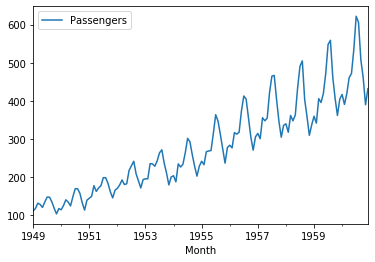

In [3]:
conversor = lambda x: datetime.strptime(x, "%Y-%m") # Carga el conversión de años y meses
datos= pd.read_csv("airline-passengers.csv",parse_dates=["Month"],date_parser=conversor)
datos.set_index("Month",inplace=True) # Indicamos que el indice es el mes y organice los datos con ese criterio
datos.plot()

In [4]:
decomposition=sm.tsa.seasonal_decompose(datos,model="additive")

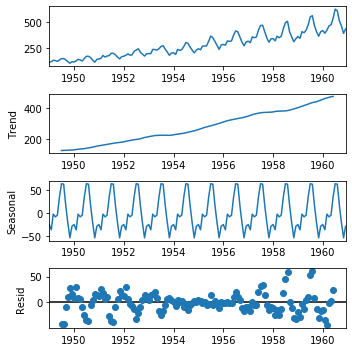

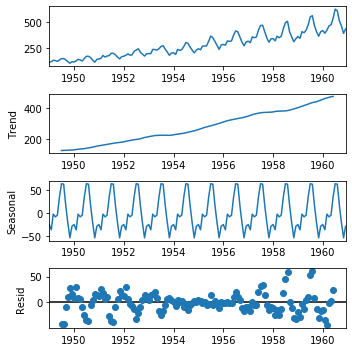

In [8]:
mpl.rcParams['figure.figsize'] = [5, 5]
decomposition.plot()

## AutoCorrelación
Como queremos hacer una autocorrelación, debemos mirar que tanto tiene que ver un dato con lo que paso anteriormente, Lag_plot nos permite visualizar ese comportamiento (lag_plot). Un lag_plot es una gráfica de demora, donde se compara un dato con un dato cercano, y permite visualizar si existe autocorrelación

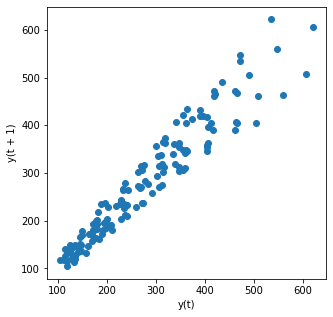

In [9]:
lag_plot(datos)

## AutoRegresión

Esto me indica que un dato o una serie de datos en cierta forma depende de los datos mismos. De esta forma, podriamos decir que lo ocurra hoy depende de lo que ha ocurrido anteriormente. 

En este caso, cargamos el modelo de AutoRegresión con una demora de 12 meses (Que es la unidad donde sabemos más o menos donde se repite el modelo), ajustele y realice la predicción. 

In [11]:
datos.to_excel("serie.xls")
model = AutoReg(datos, lags=12) #Modelo
model_fit = model.fit() #Ajusta el modelo
yhat = model_fit.predict(len(datos), len(datos)) #Tome todo los datos y prediga el siguiente dato (Enero 1 de 1961)
print(yhat)

1961-01-01    465.158867
Freq: MS, dtype: float64


C:\Users\Geo Oil Energy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
